In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline

In [163]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
* Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* Name - Name
* Sex - Sex
* Age - Age
* Sibsp - Number of Siblings/Spouses Aboard
* Parch - Number of Parents/Children Aboard
* Ticket - Ticket Number
* Fare - Passenger Fare
* Cabin - Cabin
* Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [164]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [165]:
df.shape

(891, 12)

In [166]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [167]:
df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [168]:
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [169]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [170]:
age_mean = df.Age.mean()
round(age_mean)

30

In [171]:
df.Cabin.mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [172]:
df[df["Cabin"]=="B96 B98"].value_counts().sum()

4

In [173]:
mode_cabin = ["B96 B98","C23 C25 C27","G6"]
freq_val ={}
for i in range(0,3):
    value = mode_cabin[i]
    freq = df[df["Cabin"]==str(value)].value_counts().sum()
    freq_val[str(value)] = freq
    
print(freq_val)

{'B96 B98': 4, 'C23 C25 C27': 4, 'G6': 4}


In [174]:
np.random.seed(42)
df.Age.fillna(round(age_mean),inplace=True)
df.Embarked.fillna(method="ffill",inplace=True)
df.Cabin.fillna(random.choice(mode_cabin),inplace=True)

In [175]:
random.choice(mode_cabin)

'B96 B98'

In [176]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [177]:
df.dtypes 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [178]:
# name does not seem to help us
#df.drop("Name",axis=1,inplace=True)

In [179]:
df.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [180]:
#df_new = df.drop(columns=["Fare"])

In [181]:
def columns_string(df):
    """
    Converts object type columns to categories
    Arguments: dataframe
    """
    for column,value in df.items():
        if(pd.api.types.is_string_dtype(value)):
            df[column]= value.astype("category").cat.as_ordered()
            
columns_string(df)

In [182]:
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

In [183]:
def fill_nullIn_Non_numeric_categorical(df):
    """
    Converts null values in Categorical columns to 0
    and other values in the column are assigned with some unique number
    
    arguments : dataframe
    """
       
    for c_name,value in df.items():
        if not pd.api.types.is_numeric_dtype(value):
                df[c_name] = df[c_name].cat.codes+1  # by default missing values will be given -1 to avoid this we ADD 1

fill_nullIn_Non_numeric_categorical(df)

In [184]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,109,2,22.0,1,0,524,7.2500,64,3
1,2,1,1,191,1,38.0,1,0,597,71.2833,82,1
2,3,1,3,354,1,26.0,0,0,670,7.9250,64,3
3,4,1,1,273,1,35.0,1,0,50,53.1000,56,3
4,5,0,3,16,2,35.0,0,0,473,8.0500,64,3


In [185]:
#df.drop(columns=["SibSp","Parch"],inplace=True)

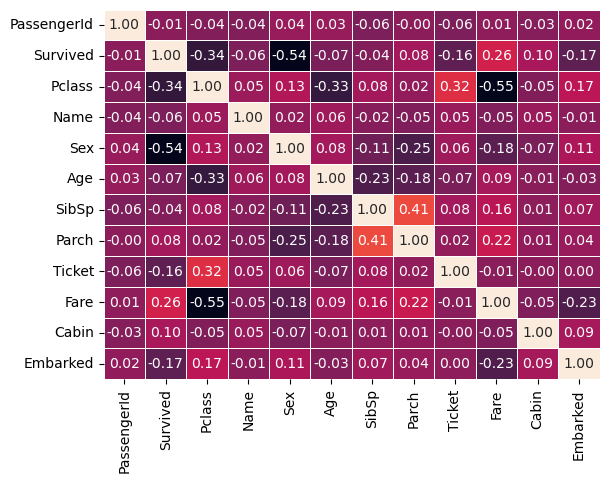

In [186]:
import seaborn as sns

ctmtx = df.corr()
sns.heatmap(ctmtx,annot=True,fmt=".2f",cbar=False,linewidths=0.5);

In [187]:
X = df.drop("Survived",axis=1)
y = df.Survived

In [205]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

clf = RandomForestClassifier()
clf.fit(X,y)

RandomForestClassifier()

In [206]:
#clf.score(X_test,y_test) #0.8100558659217877

In [207]:
X_test = pd.read_csv("test.csv")
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [208]:
np.random.seed(42)
X_test.Age.fillna(round(age_mean),inplace=True)
X_test.Embarked.fillna(method="ffill",inplace=True)
X_test.Cabin.fillna(random.choice(mode_cabin),inplace=True)

In [209]:
columns_string(X_test)

In [210]:
fill_nullIn_Non_numeric_categorical(X_test)

In [211]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,207,2,34.5,0,0,153,7.8292,76,2
1,893,3,404,1,47.0,1,0,222,7.0000,76,3
2,894,2,270,2,62.0,0,0,74,9.6875,76,2
3,895,3,409,2,27.0,0,0,148,8.6625,76,3
4,896,3,179,1,22.0,1,1,139,12.2875,76,3
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,354,2,30.0,0,0,268,8.0500,76,3
414,1306,1,284,1,39.0,0,0,325,108.9000,23,1
415,1307,3,333,2,38.5,0,0,347,7.2500,76,3
416,1308,3,385,2,30.0,0,0,221,8.0500,76,3


In [212]:
#X_test.drop(columns=["Name","Fare"],axis=1,inplace=True)

In [213]:
X_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [214]:
X_test.Fare.fillna(X_test.Fare.mean(),inplace=True)

In [215]:
X_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [216]:
#X_test.drop(columns=["SibSp","Parch"],inplace=True)

In [226]:
y_preds = clf_gs.predict(X_test)
y_preds,y_preds.shape

(array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
        1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
        0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 

In [227]:
predicted = pd.DataFrame({"PassengerId":X_test.PassengerId,
                          "Survived":y_preds})

In [228]:
predicted

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [229]:
export = predicted.to_csv("predicted-titanic.csv",index=False)

In [230]:
clf.feature_importances_

array([0.10146425, 0.05643257, 0.11722155, 0.24139201, 0.10417987,
       0.02744131, 0.02306311, 0.13939811, 0.12218413, 0.04699787,
       0.02022522])

In [231]:
from sklearn.model_selection import GridSearchCV

grid_2 = {"n_estimators":[100,200,500],
        "max_depth" : [None,5],
        "max_features" : ["auto","sqrt"],
        "min_samples_split" : [6,8],
        "min_samples_leaf" : [1,2]
       }

# Initialize model
clf2 = RandomForestClassifier(n_jobs=1)

# Initialize GridSearchCV
clf_gs = GridSearchCV(estimator=clf2,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2)

# Training the model
clf_gs.fit(X,y);

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6,

KeyboardInterrupt: 

In [ ]:
clf_gs.best_params_